In [1]:
"""
Exploración de Datos de StatsBomb para Análisis Táctico
"""

import sys
sys.path.append('..')  # Para importar desde src/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb

# Importar nuestro loader
from src.data.loader import StatsBombLoader

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


In [2]:
# Inicializar loader
loader = StatsBombLoader()

# Ver todas las competiciones
competitions = loader.get_competitions()

print(f"📊 Total de competiciones disponibles: {len(competitions)}\n")
print("Competiciones principales:")
print(competitions[['competition_name', 'season_name', 'competition_id', 'season_id']].head(15))

C:\Users\xurzy\Desktop\TFG\tfg-football-tactical-modeling\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


📊 Total de competiciones disponibles: 75

Competiciones principales:
          competition_name season_name  competition_id  season_id
0            1. Bundesliga   2023/2024               9        281
1            1. Bundesliga   2015/2016               9         27
2   African Cup of Nations        2023            1267        107
3         Champions League   2018/2019              16          4
4         Champions League   2017/2018              16          1
5         Champions League   2016/2017              16          2
6         Champions League   2015/2016              16         27
7         Champions League   2014/2015              16         26
8         Champions League   2013/2014              16         25
9         Champions League   2012/2013              16         24
10        Champions League   2011/2012              16         23
11        Champions League   2010/2011              16         22
12        Champions League   2009/2010              16         21
13     

In [3]:
# La Liga 2020/2021 (competition_id=11, season_id=90)
print("⚽ Cargando partidos de La Liga 2020/2021...\n")

matches = loader.get_matches(competition_id=11, season_id=90)

print(f"Total de partidos: {len(matches)}\n")
print("Primeros 10 partidos:")
print(matches[['match_date', 'home_team', 'away_team', 'home_score', 'away_score']].head(10))

⚽ Cargando partidos de La Liga 2020/2021...



C:\Users\xurzy\Desktop\TFG\tfg-football-tactical-modeling\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


✅ Partidos guardados en: data/raw/matches_11_90.csv
Total de partidos: 35

Primeros 10 partidos:
   match_date         home_team    away_team  home_score  away_score
0  2020-10-31  Deportivo Alavés    Barcelona           1           1
1  2021-01-09           Granada    Barcelona           0           4
2  2021-05-16         Barcelona   Celta Vigo           1           2
3  2021-02-07        Real Betis    Barcelona           2           3
4  2021-03-06           Osasuna    Barcelona           0           2
5  2021-04-10       Real Madrid    Barcelona           2           1
6  2020-12-13         Barcelona   Levante UD           1           0
7  2020-09-27         Barcelona   Villarreal           4           0
8  2020-10-01        Celta Vigo    Barcelona           0           3
9  2020-10-24         Barcelona  Real Madrid           1           3


In [4]:
# Seleccionar el primer partido de Barcelona
barcelona_matches = matches[
    (matches['home_team'] == 'Barcelona') | 
    (matches['away_team'] == 'Barcelona')
]

print(f"Partidos de Barcelona disponibles: {len(barcelona_matches)}\n")

# Tomar el primer partido
match_id = barcelona_matches.iloc[0]['match_id']
match_info = barcelona_matches.iloc[0]

print(f"🎯 Partido seleccionado:")
print(f"   Fecha: {match_info['match_date']}")
print(f"   {match_info['home_team']} {match_info['home_score']} - {match_info['away_score']} {match_info['away_team']}")
print(f"   Match ID: {match_id}")

Partidos de Barcelona disponibles: 35

🎯 Partido seleccionado:
   Fecha: 2020-10-31
   Deportivo Alavés 1 - 1 Barcelona
   Match ID: 3773386


In [5]:
# Cargar eventos completos y pases
events, passes = loader.load_match_data(match_id)

print(f"\n📋 Columnas disponibles en eventos ({len(events.columns)} columnas):")
print(events.columns.tolist())

C:\Users\xurzy\Desktop\TFG\tfg-football-tactical-modeling\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


✅ Eventos guardados en: data/raw/events_3773386.csv
📊 Partido 3773386:
   - Total eventos: 3891
   - Total pases: 1118

📋 Columnas disponibles en eventos (92 columnas):
['50_50', 'bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive', 'ball_recovery_recovery_failure', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass

📊 Distribución de tipos de eventos:

type
Pass             1118
Ball Receipt*    1059
Carry             888
Pressure          307
Ball Recovery      99
Duel               63
Dribble            40
Clearance          39
Block              39
Goal Keeper        35
Dispossessed       29
Shot               29
Foul Won           26
Miscontrol         26
Dribbled Past      26
Name: count, dtype: int64


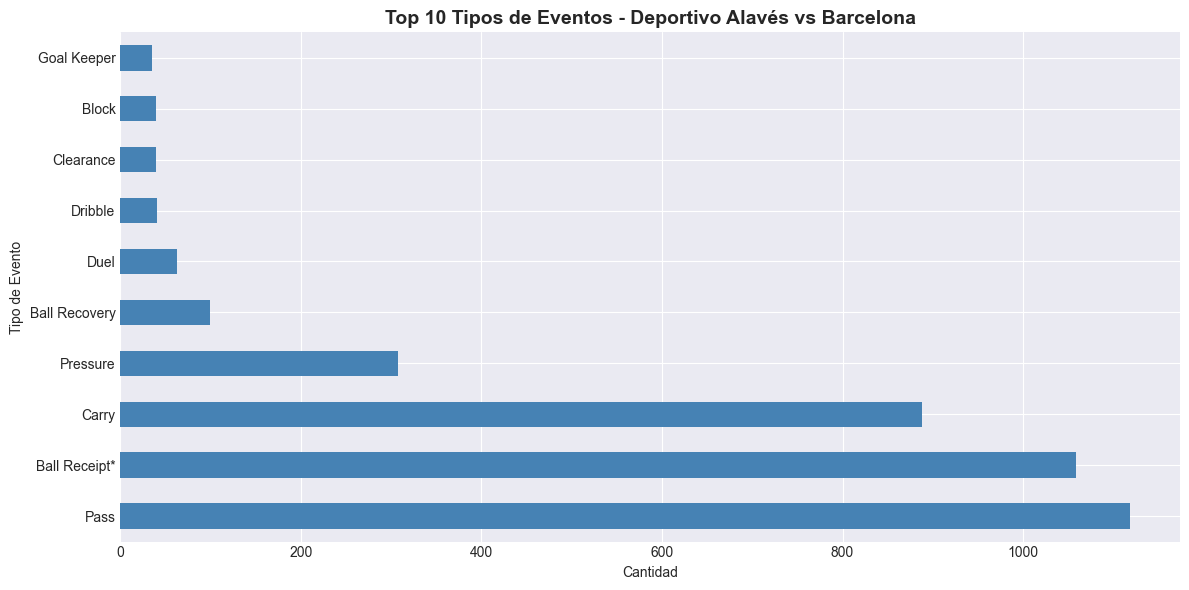

In [6]:
# Distribución de tipos de eventos
event_types = events['type'].value_counts()

print("📊 Distribución de tipos de eventos:\n")
print(event_types.head(15))

# Visualización
plt.figure(figsize=(12, 6))
event_types.head(10).plot(kind='barh', color='steelblue')
plt.title(f'Top 10 Tipos de Eventos - {match_info["home_team"]} vs {match_info["away_team"]}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Evento')
plt.tight_layout()
plt.show()

In [7]:
print(f"🎯 Análisis de {len(passes)} pases\n")

# Columnas importantes de pases
pass_columns = ['team', 'player', 'pass_recipient', 'minute', 'second', 
                'location', 'pass_end_location', 'pass_outcome', 'pass_type']

available_cols = [col for col in pass_columns if col in passes.columns]
print("Columnas de pases disponibles:")
print(available_cols)

print("\n📋 Primeros 10 pases:")
print(passes[available_cols].head(10))

# Estadísticas de pases
print(f"\n📊 Estadísticas de pases:")
print(f"   - Pases totales: {len(passes)}")
print(f"   - Pases completos: {passes['pass_outcome'].isna().sum()}")
print(f"   - Pases fallados: {passes['pass_outcome'].notna().sum()}")

if 'pass_outcome' in passes.columns:
    pass_accuracy = (passes['pass_outcome'].isna().sum() / len(passes)) * 100
    print(f"   - Precisión de pase: {pass_accuracy:.2f}%")

🎯 Análisis de 1118 pases

Columnas de pases disponibles:
['team', 'player', 'pass_recipient', 'minute', 'second', 'location', 'pass_end_location', 'pass_outcome', 'pass_type']

📋 Primeros 10 pases:
         team                    player            pass_recipient  minute  \
6   Barcelona         Antoine Griezmann  Sergio Busquets i Burgos       0   
7   Barcelona  Sergio Busquets i Burgos           Frenkie de Jong       0   
8   Barcelona           Frenkie de Jong     Gerard Piqué Bernabéu       0   
9   Barcelona     Gerard Piqué Bernabéu           Clément Lenglet       0   
10  Barcelona           Clément Lenglet  Sergio Busquets i Burgos       0   
11  Barcelona  Sergio Busquets i Burgos     Gerard Piqué Bernabéu       0   
12  Barcelona     Gerard Piqué Bernabéu           Clément Lenglet       0   
13  Barcelona           Clément Lenglet          Jordi Alba Ramos       0   
14  Barcelona          Jordi Alba Ramos  Sergio Busquets i Burgos       0   
15  Barcelona  Sergio Busquets i

⚽ Pases por equipo:

team
Barcelona           880
Deportivo Alavés    238
dtype: int64


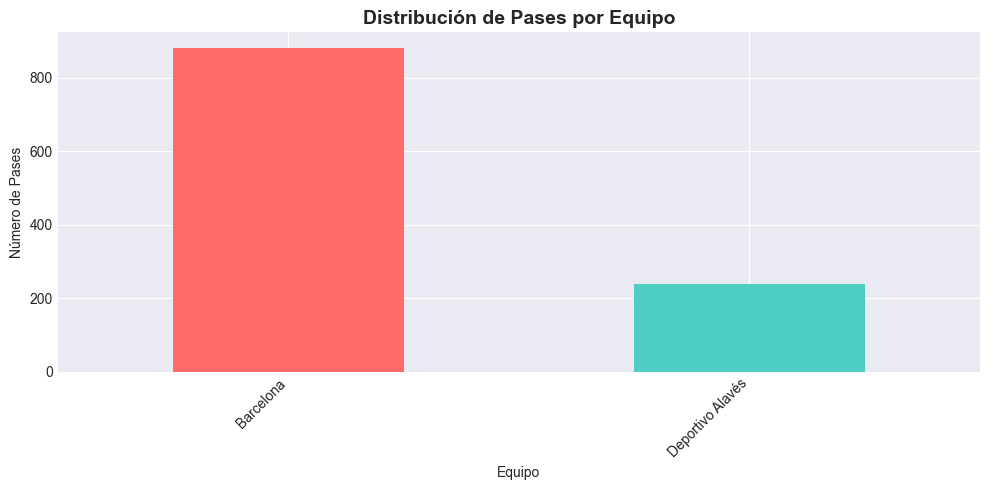

In [8]:
# Análisis por equipo
passes_by_team = passes.groupby('team').size()

print("⚽ Pases por equipo:\n")
print(passes_by_team)

# Visualización
plt.figure(figsize=(10, 5))
passes_by_team.plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('Distribución de Pases por Equipo', fontsize=14, fontweight='bold')
plt.xlabel('Equipo')
plt.ylabel('Número de Pases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

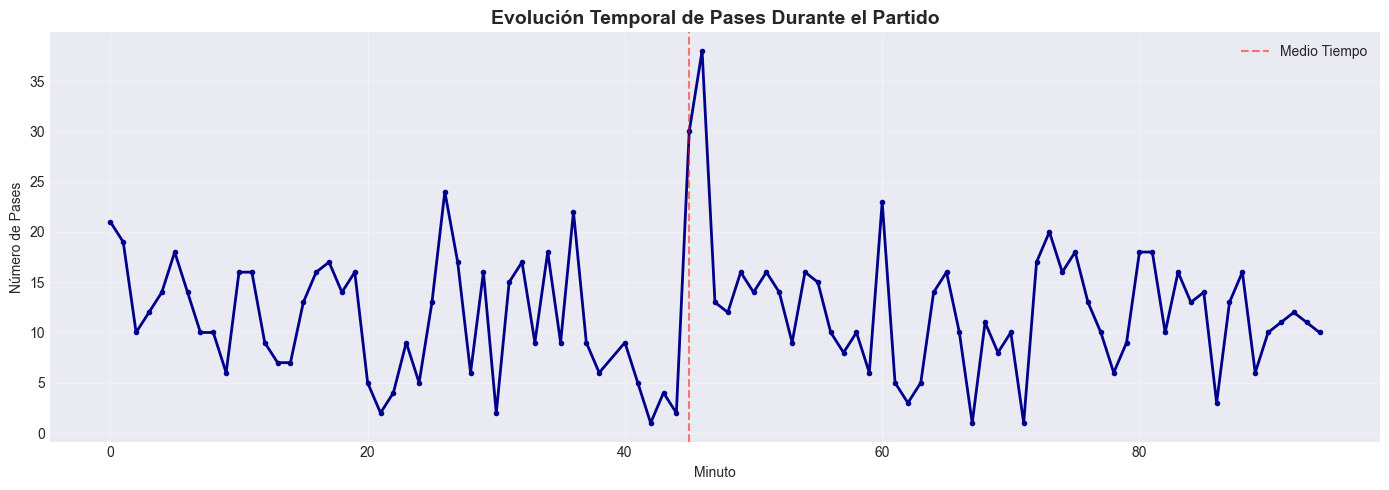


📈 Estadísticas temporales:
   - Minuto con más pases: 46 (38 pases)
   - Minuto con menos pases: 42 (1 pases)
   - Promedio por minuto: 11.89 pases


In [9]:
# Pases por minuto
if 'minute' in passes.columns:
    passes_per_minute = passes.groupby('minute').size()
    
    plt.figure(figsize=(14, 5))
    passes_per_minute.plot(kind='line', linewidth=2, color='darkblue', marker='o', markersize=3)
    plt.title('Evolución Temporal de Pases Durante el Partido', fontsize=14, fontweight='bold')
    plt.xlabel('Minuto')
    plt.ylabel('Número de Pases')
    plt.grid(True, alpha=0.3)
    plt.axvline(x=45, color='red', linestyle='--', alpha=0.5, label='Medio Tiempo')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Estadísticas temporales:")
    print(f"   - Minuto con más pases: {passes_per_minute.idxmax()} ({passes_per_minute.max()} pases)")
    print(f"   - Minuto con menos pases: {passes_per_minute.idxmin()} ({passes_per_minute.min()} pases)")
    print(f"   - Promedio por minuto: {passes_per_minute.mean():.2f} pases")

In [10]:
# Conexiones entre jugadores (red de pases básica)
if 'player' in passes.columns and 'pass_recipient' in passes.columns:
    # Limpiar datos
    pass_network = passes[['player', 'pass_recipient', 'team']].dropna()
    
    # Contar conexiones
    connections = pass_network.groupby(['player', 'pass_recipient']).size().reset_index(name='count')
    connections = connections.sort_values('count', ascending=False)
    
    print("🔗 Top 15 conexiones de pases (jugador → receptor):\n")
    print(connections.head(15))
    
    print(f"\n📊 Resumen de la red:")
    print(f"   - Jugadores únicos: {pass_network['player'].nunique()}")
    print(f"   - Receptores únicos: {pass_network['pass_recipient'].nunique()}")
    print(f"   - Conexiones únicas: {len(connections)}")

🔗 Top 15 conexiones de pases (jugador → receptor):

                                               player  \
79                              Gerard Piqué Bernabéu   
88                              Gerard Piqué Bernabéu   
204                            Sergi Roberto Carnicer   
206                            Sergi Roberto Carnicer   
211                            Sergi Roberto Carnicer   
68                                    Frenkie de Jong   
81                              Gerard Piqué Bernabéu   
72                                    Frenkie de Jong   
157                                    Miralem Pjanić   
154                                    Miralem Pjanić   
62   Francisco António Machado Mota de Castro Trincão   
126                    Lionel Andrés Messi Cuccittini   
160                                    Miralem Pjanić   
182                              Pedro González López   
26                                    Clément Lenglet   

                                   

In [11]:
print("=" * 60)
print("✅ RESUMEN DE LA EXPLORACIÓN")
print("=" * 60)
print(f"\n📊 Datos cargados:")
print(f"   - Competición: La Liga 2020/2021")
print(f"   - Total de partidos: {len(matches)}")
print(f"   - Partido analizado: {match_info['home_team']} vs {match_info['away_team']}")
print(f"   - Eventos totales: {len(events)}")
print(f"   - Pases analizados: {len(passes)}")


print("\n💾 Archivos guardados en data/raw/")
print("=" * 60)

✅ RESUMEN DE LA EXPLORACIÓN

📊 Datos cargados:
   - Competición: La Liga 2020/2021
   - Total de partidos: 35
   - Partido analizado: Deportivo Alavés vs Barcelona
   - Eventos totales: 3891
   - Pases analizados: 1118

💾 Archivos guardados en data/raw/


In [12]:
from src.data.preprocessing import PassPreprocessor, save_processed_passes

# Inicializar preprocessor
preprocessor = PassPreprocessor(min_pass_length=1.0, max_pass_length=100.0)

# Ejecutar pipeline completo
passes_clean = preprocessor.preprocess_full_pipeline(events)

# Ver resumen
preprocessor.print_summary(passes_clean)


🧹 INICIANDO PIPELINE DE PREPROCESAMIENTO

📊 Eventos totales: 3891
✅ Pases encontrados: 1118
🧹 Pases después de eliminar nulos en player/team: 1118
✅ Precisión de pase: 83.90%
🧹 Pases después de filtrar por distancia: 1118 (eliminados: 0)
✅ Normalización temporal completada
🧹 Pases con receptor válido: 1060 (eliminados: 58)

✅ PREPROCESAMIENTO COMPLETADO: 1060 pases válidos


📊 RESUMEN DE DATOS PREPROCESADOS
Total de pases: 1060
Pases exitosos: 938
Precisión: 88.49%
Jugadores únicos: 32
Receptores únicos: 31
Equipos: Barcelona, Deportivo Alavés

Distancia de pases:
  - Promedio: 17.43m
  - Mínima: 1.50m
  - Máxima: 88.40m



In [13]:
# Comparación antes y después del preprocesamiento
print("📊 COMPARACIÓN ANTES/DESPUÉS DEL PREPROCESAMIENTO")
print("="*60)
print(f"Pases originales: {len(passes)}")
print(f"Pases preprocesados: {len(passes_clean)}")
print(f"Pases eliminados: {len(passes) - len(passes_clean)} ({((len(passes) - len(passes_clean))/len(passes)*100):.2f}%)")
print("="*60)

# Columnas añadidas
new_columns = set(passes_clean.columns) - set(passes.columns)
print(f"\n✨ Nuevas columnas añadidas: {new_columns}")

# Muestra de datos limpios
print("\n📋 Muestra de datos preprocesados:")
display_cols = ['player', 'pass_recipient', 'minute', 'pass_success', 'pass_distance', 'timestamp']
available = [col for col in display_cols if col in passes_clean.columns]
passes_clean[available].head(10)

📊 COMPARACIÓN ANTES/DESPUÉS DEL PREPROCESAMIENTO
Pases originales: 1118
Pases preprocesados: 1060
Pases eliminados: 58 (5.19%)

✨ Nuevas columnas añadidas: {'pass_distance', 'pass_success', 'half'}

📋 Muestra de datos preprocesados:


,player,pass_recipient,minute,pass_success,pass_distance,timestamp
0,Antoine Griezmann,Sergio Busquets i Burgos,0,1,12.210242,0
1,Sergio Busquets i Burgos,Frenkie de Jong,0,1,15.471910,1
2,Frenkie de Jong,Gerard Piqué Bernabéu,0,1,24.489998,5
3,Gerard Piqué Bernabéu,Clément Lenglet,0,1,20.763911,10
4,Clément Lenglet,Sergio Busquets i Burgos,0,1,10.023971,14
5,Sergio Busquets i Burgos,Gerard Piqué Bernabéu,0,1,23.129418,15
6,Gerard Piqué Bernabéu,Clément Lenglet,0,1,24.148085,20
7,Clément Lenglet,Jordi Alba Ramos,0,1,16.707483,23
8,Jordi Alba Ramos,Sergio Busquets i Burgos,0,1,14.483784,25
9,Sergio Busquets i Burgos,Sergi Roberto Carnicer,0,1,33.092748,27


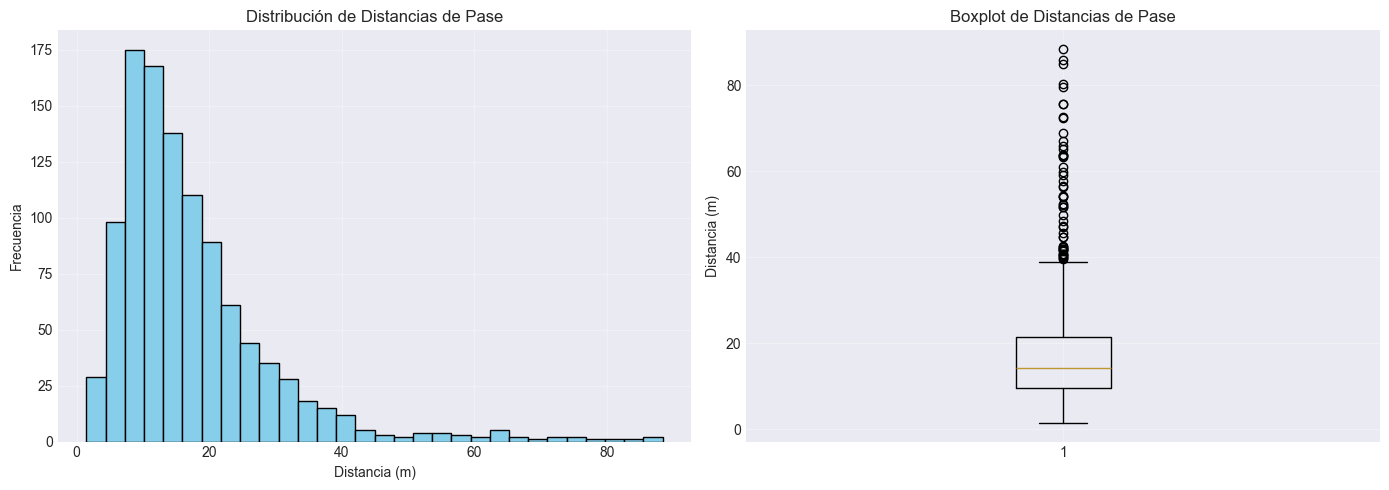

📊 Estadísticas de distancia:
count    1060.000000
mean       17.428098
std        12.050663
min         1.500000
25%         9.685003
50%        14.243236
75%        21.413313
max        88.395588
Name: pass_distance, dtype: float64


In [14]:
# Visualizar distribución de distancias de pase
if 'pass_distance' in passes_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma
    axes[0].hist(passes_clean['pass_distance'], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_xlabel('Distancia (m)')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_title('Distribución de Distancias de Pase')
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(passes_clean['pass_distance'], vert=True)
    axes[1].set_ylabel('Distancia (m)')
    axes[1].set_title('Boxplot de Distancias de Pase')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Estadísticas de distancia:")
    print(passes_clean['pass_distance'].describe())

In [15]:
# Guardar datos preprocesados
save_processed_passes(passes_clean, f'data/processed/passes_match_{match_id}.csv')

print(f"✅ Datos preprocesados guardados exitosamente")
print(f"📁 Ubicación: data/processed/passes_match_{match_id}.csv")

💾 Datos guardados en: data/processed/passes_match_3773386.csv
✅ Datos preprocesados guardados exitosamente
📁 Ubicación: data/processed/passes_match_3773386.csv
